# World Happiness Report 
Data has been obtained from this reference:
(https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021?select=world-happiness-report.csv)



### Objectives

In this data set we have informtion about some social issues of different countries and years. The aim of this analysis is to **predict the corresponding Life Ladder** (related with the happinnes of a certain country), and also to **interpret** the main features involved in a high *Life Ladder*.

### Description of the data set

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pylab import * 
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

plt.rcParams["font.family"] = "Times New Roman"

In [2]:
# Import of the data
filepath = 'data/WHR.csv'
data = pd.read_csv(filepath, sep = ',')

As we will see in the following code lines, we have information of serveral years for all countries. The data set has 1949 rows and 11 features, from which the **Life Ladder** would be considered as the output.

In [3]:
data.shape

(1949, 11)

We have information of **166 countries**:

In [5]:
len(data['Country name'].unique())

166

The differnet features correspond to **Country name**, **Year**, **Life Ladder**, **Log GDP per capita**, **Social support**, **Healthy life expectancy at birth**, **Freedom to make life choices**, **Generosity**, **Perceptions of corruption**, **Positive affect** and **Negative affect**. some information about this data set is presented bellow:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


We observe that in this case the only object column corresponds to the Country name. Some of them also present some *null* values. We won't replace them by the mean since some bias in the data can be imposed (we have data evolution with respect to time for each country). In this case, they will not be replaced by 0’s or neither dropped, since it could distort
data information. For instance, if adding 0’s to Healthy life expectancy at birth, we could
diminish and distort the mean value.

# Linear Regressions and predictions

In this section we will try to adjust a linear model to the variable **Life Ladder** with respect to the other features. We will drop data under year 2005, since at that time small amout of countries delivered their data.

In [65]:
data = data.loc[data['year']>2005]

In [165]:
data = data.dropna()

Now let's devide our data frame in outcome (**y**) and features (**X**) subdataframes:

In [9]:
y = data['Life Ladder']
X = data.drop(['Life Ladder', 'Country name'], axis = 1)

In the following sections we will try to adjust different linear models using cross validations. The $R^2$ score will be computed from all of them and after that the best model will be chosen.

## Simple Linear Regression

We will not apply Polynomial features since we are interested first on **interpretation**.

The r2 score for LR: 0.6766212635330824
LR coef: [-0.03756272  0.43504567  0.24784061  0.20904851  0.07405022  0.0570688
 -0.13034286  0.20497869 -0.00321132]


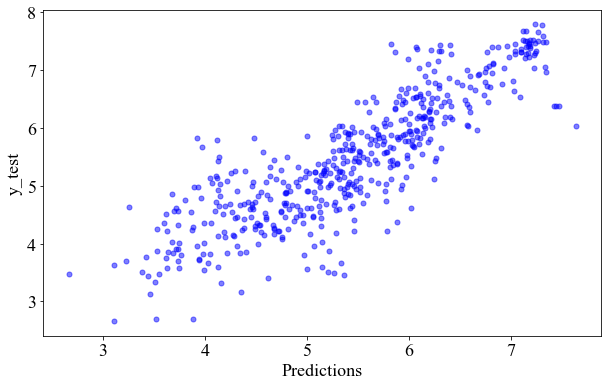

In [173]:
# Train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=72018) 
s = StandardScaler()
LR = LinearRegression()

X_train_s = s.fit_transform(X_train)

LR.fit(X_train_s, y_train)

X_test_s = s.transform(X_test)

y_pred = LR.predict(X_test_s)


# Plot the predictions
ax1 = plt.axes()
plt.rcParams['font.size'] = '18'
plt.rcParams["figure.figsize"] = (10,6)

ax1.plot(y_pred, y_test, marker = 'o', color= 'blue', markersize = 5, alpha =0.5, ls = '')

ax1.set_xlabel('Predictions')
ax1.set_ylabel('y_test')

print('The r2 score for LR:', r2_score(y_pred, y_test))
print('LR coef:', LR.coef_)

Observing the coefficients, GDP is the one with higher predictive power.

### Now let's check with ***cross validation***

The r2 score for LR: 0.7660353146910673


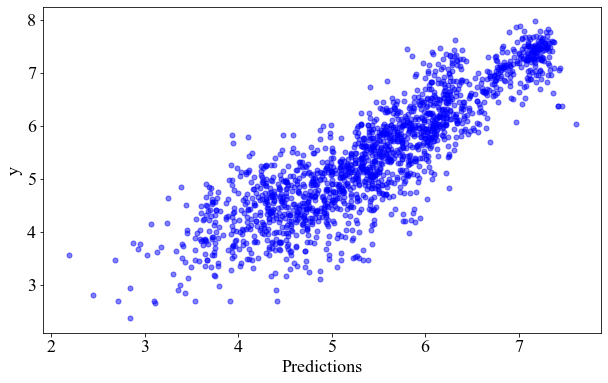

In [174]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline

s = StandardScaler()
LR = LinearRegression()

kf = KFold(shuffle=True, random_state=72018, n_splits=3)

estimator = Pipeline([("scaler", s),
                      ("regression", LR)])

predictions = cross_val_predict(estimator, X, y, cv=kf)


# We do the plot
ax1 = plt.axes()

ax1.plot(predictions, y, marker = 'o', color= 'blue', markersize = 5, alpha =0.5, ls = '')

ax1.set_xlabel('Predictions')
ax1.set_ylabel('y')

print('The r2 score for LR:', r2_score(y, predictions))

With  ***cross validation*** we increased the $R^2$ score.

## `Polynomial Features` with Cross validation

Let's try **polynomial features**  with ***cross validation*** to check is we can improve the model.

The r2 score for LR: 0.7660353146910673
The r2 score for LR_poly: 0.7873917500065202


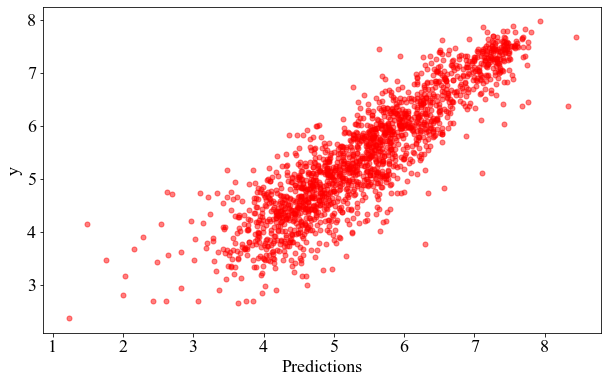

In [175]:
# We prepare a new estimator
s = StandardScaler()
LR = LinearRegression()
pf = PolynomialFeatures(degree=3)

kf = KFold(shuffle=True, random_state=72018, n_splits=3)

estimator_p = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("linear_regression", LR)])

predictions_poly = cross_val_predict(estimator_p, X, y, cv = kf)
    
# We do the plot
ax1 = plt.axes()

ax1.plot(predictions_poly, y, marker = 'o', color= 'red', markersize = 5, alpha =0.5, ls = '')

ax1.set_xlabel('Predictions')
ax1.set_ylabel('y')

print('The r2 score for LR:', r2_score(y, predictions))
print('The r2 score for LR_poly:', r2_score(y, predictions_poly))

For the moment polynomial features increase the goodness of the model.

## `LASSO` regression with CV and a set of $\lambda$


Let's start with `LASSO`. We set a lambdas between 0.06 and 20, and we explre after that for which $\lambda$ we obtain better performance.

Scores    0.781292
Alphas    0.060000
Name: 0, dtype: float64


Text(0.5, 0.98, 'LASSO regression')

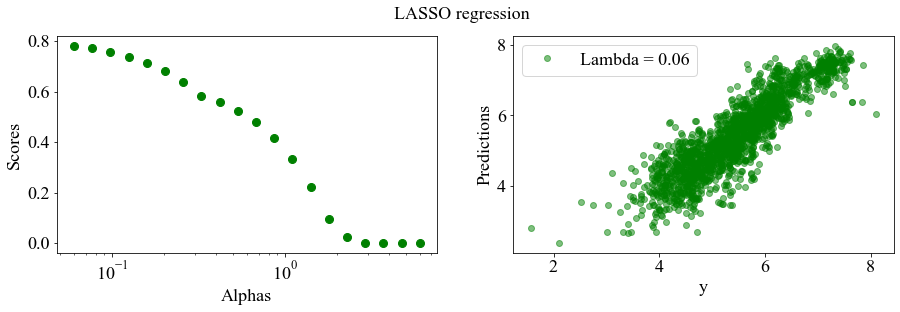

In [176]:
# We prepare a new estimator
s = StandardScaler()
pf = PolynomialFeatures(degree=3)
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

scores = []
alphas = np.geomspace(0.06, 6.0, 20)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator_l = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions_l = cross_val_predict(estimator_l, X, y, cv = kf)
    
    score = r2_score(y, predictions_l)
    
    scores.append(score)

# We plot the alphas and scores and preddictions

param = {'Scores': scores, 'Alphas': alphas}
params = pd.DataFrame(param)
print(params.loc[params['Scores'].idxmax()])


################################################
# I put the optimal values for lambda = 0.06
las = Lasso(alpha=0.06, max_iter=100000)
estimator_l = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

predictions_l = cross_val_predict(estimator_l, X, y, cv = kf)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
ax1.semilogx(alphas, scores, marker = 'o', ls ='', color = 'green', markersize = 8)
ax2.plot(predictions_l, y, marker = 'o', ls ='', color = 'green'
         , alpha = 0.5, label = 'Lambda = 0.06')

ax1.set_xlabel('Alphas')
ax1.set_ylabel('Scores')

ax2.set_xlabel('y')
ax2.set_ylabel('Predictions')

ax2.legend()
fig.suptitle("LASSO regression", fontsize=18)
#################################################

We observe that the hishest score is obtained at the smallest value of $\lambda$, wich means that almost no penalty is applyied to the highest coefficients of the linear regression (with polynomial features). In fact, the simple Linear Regression with polynomial features and no regularizations performs a better score than LASSO.

## `RIDGE` regression with Cross validation and a set of $\lambda$.


Scores     0.804518
Alphas    35.544953
Name: 37, dtype: float64


Text(0.5, 0.98, 'RIDGE regression')

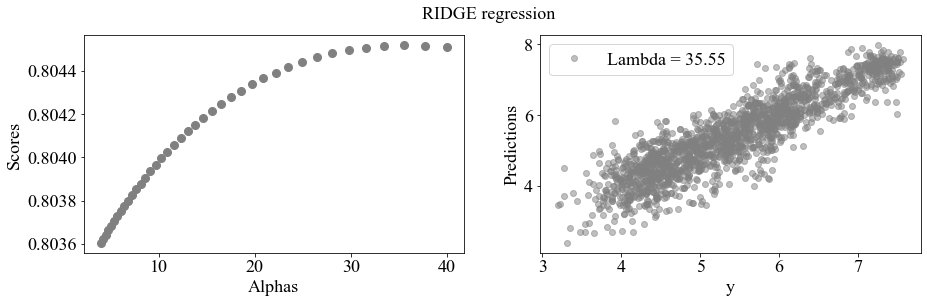

In [177]:
from sklearn.linear_model import Ridge
pf = PolynomialFeatures(degree=2)
s = StandardScaler()
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

alphas = np.geomspace(4, 40, 40)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator_r = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions_r = cross_val_predict(estimator_r, X, y, cv = kf)
    score = r2_score(y, predictions_r)
    scores.append(score)


# The best parameters
param = {'Scores': scores, 'Alphas': alphas}
params = pd.DataFrame(param)
print(params.loc[params['Scores'].idxmax()])


##############################################################
# New we plot alphas and scores as before

ridge = Ridge(alpha=35.544953, max_iter=100000)
estimator_r = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("ridge_regression", ridge)])

predictions_r = cross_val_predict(estimator_r, X, y, cv = kf)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
ax1.plot(alphas, scores, marker = 'o', ls ='', color = 'gray', markersize = 8)
ax2.plot(predictions_r, y, marker = 'o', ls ='', color = 'gray'
         , alpha = 0.5, label = 'Lambda = 35.55')

ax1.set_xlabel('Alphas')
ax1.set_ylabel('Scores')

ax2.set_xlabel('y')
ax2.set_ylabel('Predictions')

ax2.legend()
fig.suptitle("RIDGE regression", fontsize=18)
###############################################################

It is observed that the highest score is obtained at $\lambda\sim 35.55$ and also the best $R^2$ which is $\sim 0.8$ so far.

## Discussion

Recall that the $R^2$ obtained are the following for each regression model.

In [178]:
print('The r2 score for LR:', r2_score(y, predictions))
print('The r2 score for LR_poly:', r2_score(y, predictions_poly))
print('The r2 score for LASSO_poly:', r2_score(y, predictions_l))
print('The r2 score for RIDGE_poly:', r2_score(y, predictions_r))

The r2 score for LR: 0.7660353146910673
The r2 score for LR_poly: 0.7873917500065202
The r2 score for LASSO_poly: 0.781291609952466
The r2 score for RIDGE_poly: 0.8045182459811341


The model which performs the best regression is the `Ridge` regression with $\lambda = 35.55$ with $R^2\sim 0.8$. In terms of explanability we will take the `Linear regression`, where observing the coefficients of each feature we infer that GDP is the one with higher predictive power.

## Suggestions

May be in the near future it would be interesting to observe predictions with respect to time, since we have data for each country for different years, from 2005 to 2020. Nonetheless, maybe a different treatment in order to apply machine learning whould be considered since we will be dealing with temporal series.

Also, better data will be also needed, since we lack from several years information for some countries.